# Assignment 2-Deep Learning -MSDA 3100
## By Naveena Chatti (ID: C70303901)
## Problem 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
 import torch
 import torchvision
 import torchvision.transforms as transforms

In [ ]:
# Define a device
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4     #You can change the batch size if you receive an out of memory error

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:03<00:00, 45354543.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


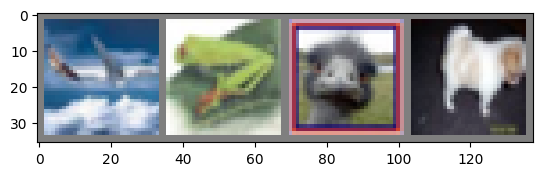

plane frog  bird  dog  


In [ ]:
# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to unnormalize and show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [ ]:
# Defining a Convolutional Neural Network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16,10,3)
        self.pool2 = nn.MaxPool2d(2, 1)
        self.fc1 = nn.Linear(10 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)



Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=40, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


Epoch [1/20], Average Loss: 2.008
Epoch [2/20], Average Loss: 1.548
Epoch [3/20], Average Loss: 1.398
Epoch [4/20], Average Loss: 1.325
Epoch [5/20], Average Loss: 1.284
Epoch [6/20], Average Loss: 1.255
Epoch [7/20], Average Loss: 1.238
Epoch [8/20], Average Loss: 1.222
Epoch [9/20], Average Loss: 1.208
Epoch [10/20], Average Loss: 1.200
Epoch [11/20], Average Loss: 1.189
Epoch [12/20], Average Loss: 1.182
Epoch [13/20], Average Loss: 1.176
Epoch [14/20], Average Loss: 1.167
Epoch [15/20], Average Loss: 1.164
Epoch [16/20], Average Loss: 1.157
Epoch [17/20], Average Loss: 1.158
Epoch [18/20], Average Loss: 1.149
Epoch [19/20], Average Loss: 1.147
Epoch [20/20], Average Loss: 1.148
Finished Training


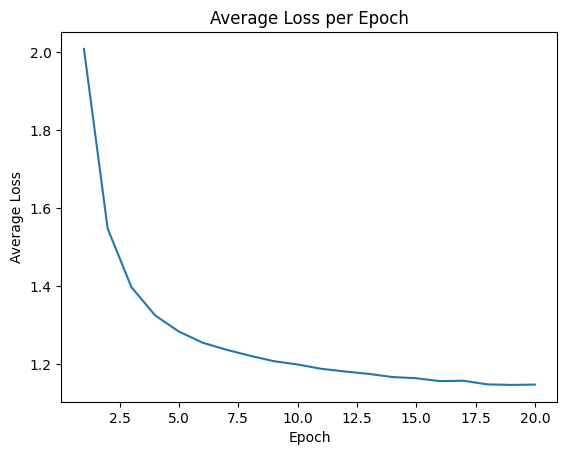

In [ ]:
# Training the network for 20 epochs and tracking average loss
num_epochs = 20
loss_list = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Average loss for this epoch
    average_loss = running_loss / len(trainloader)
    loss_list.append(average_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Average Loss: {average_loss:.3f}')

print('Finished Training')
# Plotting average loss
plt.plot(range(1, num_epochs + 1), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss per Epoch')
plt.show()



In [ ]:
# Set the model to evaluation mode
net.eval()

# Variables to track correct predictions and total samples
correct_train = 0
total_train = 0

with torch.no_grad():  # Disable gradient computation
    for data in trainloader:  # Iterate over the training data
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)  # Forward pass to get predictions
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class index
        total_train += labels.size(0)  # Update total samples
        correct_train += (predicted == labels).sum().item()  # Update correct predictions

# Calculate average accuracy for training dataset
average_accuracy_train = 100 * correct_train / total_train  # Convert to percentage

print(f'Average Accuracy of Training Dataset after Epoch 20: {average_accuracy_train:.2f}%')


Average Accuracy of Training Dataset after Epoch 20: 61.41%


In [ ]:
# Set the model to evaluation mode
net.eval()

# Variables to track correct predictions and total samples for the test set
correct_test = 0
total_test = 0

with torch.no_grad():  # Disable gradient computation
    for data in testloader:  # Iterate over the testing data
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)  # Forward pass to get predictions
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class index
        total_test += labels.size(0)  # Update total samples
        correct_test += (predicted == labels).sum().item()  # Update correct predictions

# Calculate average accuracy for testing dataset
average_accuracy_test = 100 * correct_test / total_test  # Convert to percentage

print(f'Average Accuracy of Testing Dataset after Epoch 20: {average_accuracy_test:.2f}%')


Average Accuracy of Testing Dataset after Epoch 20: 56.98%


In [ ]:
# Calculate average accuracy for each class on training data
correct_pred_train = {classname: 0 for classname in classes}
total_pred_train = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred_train[classes[label]] += 1
            total_pred_train[classes[label]] += 1

# Print accuracy for each class in training set
for classname, correct_count in correct_pred_train.items():
    accuracy = 100 * float(correct_count) / total_pred_train[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Accuracy for class: plane is 64.2 %
Accuracy for class: car   is 84.9 %
Accuracy for class: bird  is 48.4 %
Accuracy for class: cat   is 33.4 %
Accuracy for class: deer  is 39.2 %
Accuracy for class: dog   is 59.1 %
Accuracy for class: frog  is 71.3 %
Accuracy for class: horse is 73.1 %
Accuracy for class: ship  is 77.7 %
Accuracy for class: truck is 62.9 %


In [ ]:
# Calculate average accuracy for each class on testing data
correct_pred_test = {classname: 0 for classname in classes}
total_pred_test = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred_test[classes[label]] += 1
            total_pred_test[classes[label]] += 1

# Print accuracy for each class in training set
for classname, correct_count in correct_pred_test.items():
    accuracy = 100 * float(correct_count) / total_pred_test[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 58.5 %
Accuracy for class: car   is 78.6 %
Accuracy for class: bird  is 41.9 %
Accuracy for class: cat   is 31.3 %
Accuracy for class: deer  is 33.2 %
Accuracy for class: dog   is 56.4 %
Accuracy for class: frog  is 69.6 %
Accuracy for class: horse is 68.3 %
Accuracy for class: ship  is 73.8 %
Accuracy for class: truck is 58.2 %


In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=8ebd655ef1abdc4a6f312f168c2d1c2b83a8e9863c568f43434b827f10f1a53a
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


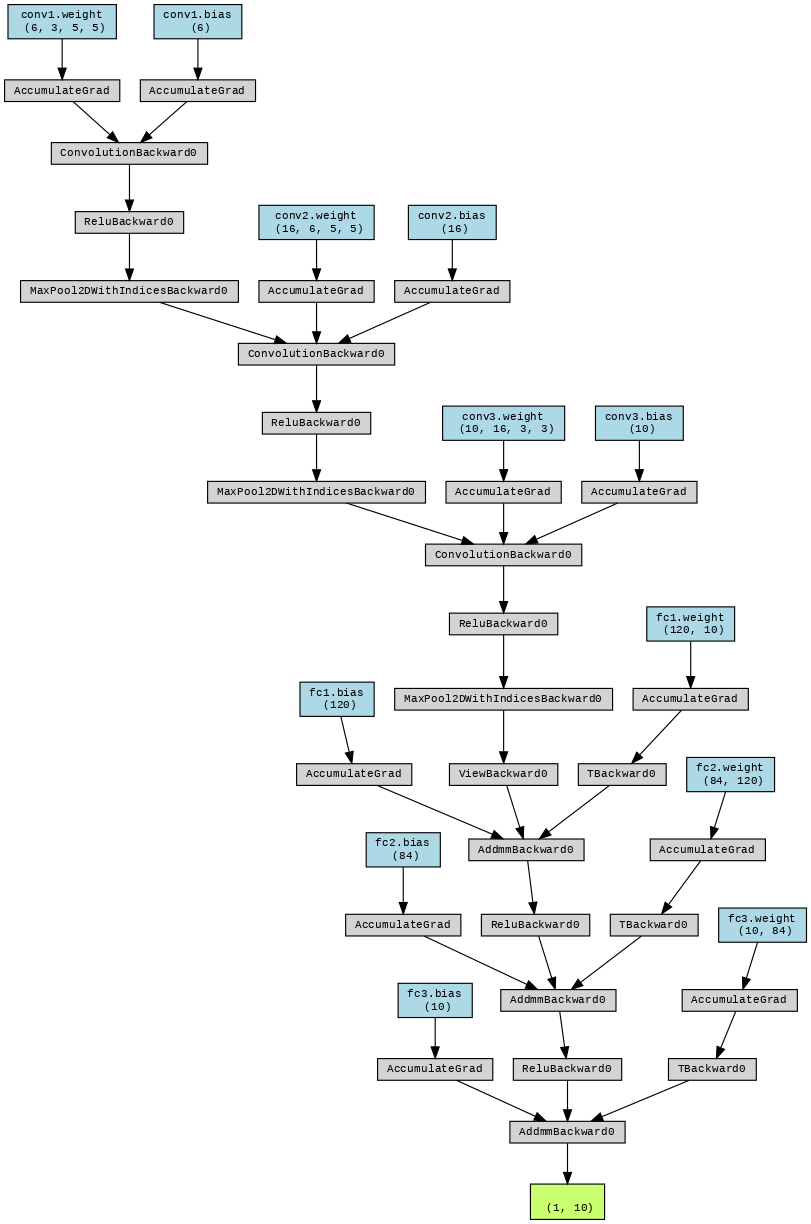

In [ ]:

from torchviz import make_dot
import torch
from IPython.display import Image

model = net1  # Using the trained model instance
x = torch.randn(1, 3, 32, 32).to(device)  # Adjust input shape as necessary

# Pass a sample input through the model to generate the graph
y = model(x)

# Create the visualization using make_dot
dot = make_dot(y, params=dict(model.named_parameters()))

# Save the visualization as an image file
dot.render("model_architecture", format="png")

# Display the image in the notebook
Image(filename="model_architecture.png")